In [52]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import scale
from sklearn.metrics import silhouette_score

In [7]:
df = pd.read_csv("Stores.csv")

In [8]:
df

,Store ID,Store_Area,Items_Available,Daily_Customer_Count,Store_Sales
0,1,1659,1961,530,66490
1,2,1461,1752,210,39820
2,3,1340,1609,720,54010
3,4,1451,1748,620,53730
4,5,1770,2111,450,46620
...,...,...,...,...,...
891,892,1582,1910,1080,66390
892,893,1387,1663,850,82080
893,894,1200,1436,1060,76440
894,895,1299,1560,770,96610


# Infografía

- **Store ID**: ID de una tienda particular.
- **Store_Area**: Área de la tienda en yardas.
- **Items_Available**: Número de items disponibles en la tienda.
- **Daily_Customer_Count**: Número de clientes que visitaron la tiendas en promedio durante el mes.
- **Store_Sales**: Venta en dólares hecha por la tienda.

# Objetivo

Establecer consejo(s) para aumentar las ganancias del supermercado.

# EDA

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 896 entries, 0 to 895
Data columns (total 5 columns):
 #   Column                Non-Null Count  Dtype
---  ------                --------------  -----
 0   Store ID              896 non-null    int64
 1   Store_Area            896 non-null    int64
 2   Items_Available       896 non-null    int64
 3   Daily_Customer_Count  896 non-null    int64
 4   Store_Sales           896 non-null    int64
dtypes: int64(5)
memory usage: 35.1 KB


In [9]:
# Store ID contiene espacio en blanco al final
# Se eliminan todos los espacios antes o después en los nombres de columna
df.columns = [col.strip() for col in df.columns]

In [21]:
# Verificando que la columna Store ID se puede usar como índice
df['Store ID'].compare(pd.Series(np.arange(1,897,1)))

,self,other


In [22]:
df.set_index('Store ID', inplace=True)

In [25]:
# Store_Area, Store_Sales son continuas
df[['Store_Area', 'Store_Sales']] = df[['Store_Area', 'Store_Sales']].astype('float')

In [28]:
# Yardas^2 a metros^2
df['Store_Area'] = df['Store_Area']*0.9144**2 

In [29]:
df.describe()

,Store_Area,Items_Available,Daily_Customer_Count,Store_Sales
count,896.000000,896.000000,896.000000,896.000000
mean,1241.991606,1782.035714,786.350446,59351.305804
std,209.230011,299.872053,265.389281,17190.741895
min,647.998704,932.000000,10.000000,14920.000000
25%,1100.970701,1575.500000,600.000000,46530.000000
50%,1234.960111,1773.500000,780.000000,58605.000000
75%,1382.536590,1982.750000,970.000000,71872.500000
max,1863.727885,2667.000000,1560.000000,116320.000000


<AxesSubplot:xlabel='Store_Area', ylabel='Count'>

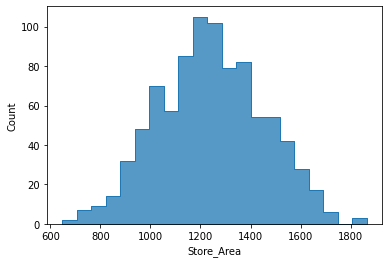

In [31]:
sns.histplot(x='Store_Area', data=df,  element='step')

<AxesSubplot:xlabel='Store_Sales', ylabel='Count'>

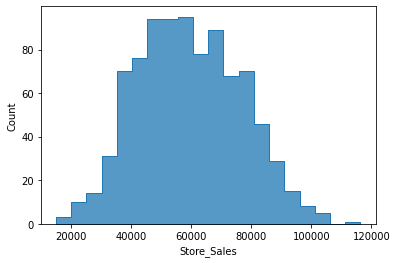

In [32]:
sns.histplot(x='Store_Sales', data=df,  element='step')

<AxesSubplot:xlabel='Items_Available', ylabel='Count'>

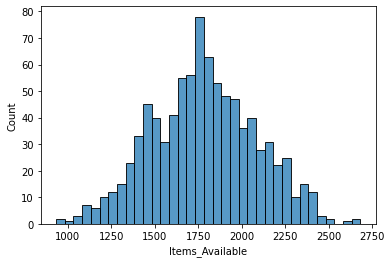

In [40]:
sns.histplot(x='Items_Available', data=df, binwidth=50)

<AxesSubplot:xlabel='Daily_Customer_Count', ylabel='Count'>

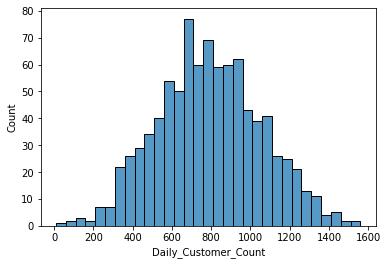

In [41]:
sns.histplot(x='Daily_Customer_Count', data=df, binwidth=50)

In [45]:
df.corr()

,Store_Area,Items_Available,Daily_Customer_Count,Store_Sales
Store_Area,1.000000,0.998891,-0.041423,0.097474
Items_Available,0.998891,1.000000,-0.040978,0.098849
Daily_Customer_Count,-0.041423,-0.040978,1.000000,0.008629
Store_Sales,0.097474,0.098849,0.008629,1.000000


No es sorprendente la fuerte relación entre el área de la tienda y el número de items. La idea en una tienda es ofrecer tanto como se pueda, y ese tanto depende de la visibilidad de los productos.

Surge una pregunta que no sé si sea posible aclarar con la información disponible: ¿Son el conteo de productos todos items diferentes?

La relación entre la cantidad promedio de clientes y las ventas parece difusa. Tal vez sea importante encaminar un estudio de clustering para ver si en agrupamientos más finos se descubren patrones más poderosos.

Es de notarse que entre más clientes menos items disponibles habrá.

No resulta intuitivo que entre más clientes menor sea el área de la tienda. Esto merece un estudio más profundo.

In [53]:
# Escalado de datos
X = df.to_numpy()
X_scaled = scale(X)

In [76]:
# Modelo
dbscan = DBSCAN(
    eps = 0.5,
    min_samples = 7,
    metric = 'euclidean'
)

dbscan.fit(X=X_scaled)

DBSCAN(min_samples=7)

In [77]:
labels = dbscan.labels_

In [78]:
df['cluster']= labels

In [79]:
df['cluster'].value_counts()

 0    574
-1    292
 2     11
 3     10
 1      9
Name: cluster, dtype: int64

In [82]:
df[df['cluster']!=-1].corr()

,Store_Area,Items_Available,Daily_Customer_Count,Store_Sales,cluster
Store_Area,1.000000,0.997858,-0.051254,0.128532,-0.029027
Items_Available,0.997858,1.000000,-0.050518,0.130466,-0.030958
Daily_Customer_Count,-0.051254,-0.050518,1.000000,0.006489,0.327227
Store_Sales,0.128532,0.130466,0.006489,1.000000,-0.163597
cluster,-0.029027,-0.030958,0.327227,-0.163597,1.000000


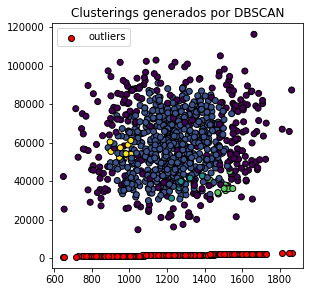

In [81]:
# Clasificación
# ==============================================================================
labels = dbscan.labels_

fig, ax = plt.subplots(1, 1, figsize=(4.5, 4.5))

ax.scatter(
    x = X[:, 0],
    y = X[:, -1], 
    c = labels,
    marker    = 'o',
    edgecolor = 'black'
)

# Los outliers se identifican con el label -1
ax.scatter(
    x = X[labels == -1, 0],
    y = X[labels == -1, 1], 
    c = 'red',
    marker    = 'o',
    edgecolor = 'black',
    label = 'outliers'
)

ax.legend()
ax.set_title('Clusterings generados por DBSCAN');

In [83]:
df = df[df['cluster']!=-1]

In [84]:
df.corr()

,Store_Area,Items_Available,Daily_Customer_Count,Store_Sales,cluster
Store_Area,1.000000,0.997858,-0.051254,0.128532,-0.029027
Items_Available,0.997858,1.000000,-0.050518,0.130466,-0.030958
Daily_Customer_Count,-0.051254,-0.050518,1.000000,0.006489,0.327227
Store_Sales,0.128532,0.130466,0.006489,1.000000,-0.163597
cluster,-0.029027,-0.030958,0.327227,-0.163597,1.000000


In [85]:
df['cluster'].value_counts()

0    574
2     11
3     10
1      9
Name: cluster, dtype: int64

- ¿Qué características tienen las tiendas que venden más? Esta puede ser una línea de investigación interesante. Si se logran identificar esas cosas que hace que las tiendas imiten a las mejores tiendas en ventas, se podrían dar ciertas recomendaciones.
- También se puede construir un modelo predictivo para las ventas de la tienda. Serían a lo sumo sólo 3 variables predictoras. Se podría construir el modelo predictivo y luego optimizar en el espacio de búsqueda. Una vez encontradas regiones de óptimos, 